In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data={}
data['raw']=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/GOLD.csv")
data['raw'].set_index( data['raw'].Date, inplace=True )
data['train']   = data['raw'][ -np.isnan(data['raw']['Pred']) ]  
data['test']    = data['raw'][  np.isnan(data['raw']['Pred']) ] 


In [4]:
data

{'raw':                       Date  Price   Open   High    Low    Vol. Change %  \
 Date                                                                      
 May 04, 2017  May 04, 2017  28060  28400  28482  28025   0.08K   -1.79%   
 May 05, 2017  May 05, 2017  28184  28136  28382  28135   0.06K    0.44%   
 May 08, 2017  May 08, 2017  28119  28145  28255  28097   7.85K   -0.23%   
 May 09, 2017  May 09, 2017  27981  28125  28192  27947  10.10K   -0.49%   
 May 10, 2017  May 10, 2017  28007  28060  28146  27981   9.28K    0.09%   
 ...                    ...    ...    ...    ...    ...     ...      ...   
 Apr 26, 2019  Apr 26, 2019  31868  31851  31934  31705   9.67K    0.08%   
 Apr 30, 2019  Apr 30, 2019  31625  31800  31824  31597   6.44K   -0.76%   
 May 01, 2019  May 01, 2019  31563  31604  31657  31503   1.55K   -0.20%   
 May 02, 2019  May 02, 2019  31203  31420  31425  31160   0.48K   -1.14%   
 May 03, 2019  May 03, 2019  31341  31250  31500  31163   0.08K    0.44%   
 
   

In [5]:
data['train'].head(10)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
"May 04, 2017","May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017","May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017","May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017","May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017","May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
"May 11, 2017","May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
"May 12, 2017","May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
"May 15, 2017","May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
"May 16, 2017","May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


In [6]:
data['test'].head(10)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
"Dec 11, 2018","Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
"Dec 12, 2018","Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
"Dec 13, 2018","Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
"Dec 14, 2018","Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
"Dec 17, 2018","Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
"Dec 18, 2018","Dec 18, 2018",31075,31589,31650,31041,10.18K,-1.35%,NaN,95.667053
"Dec 19, 2018","Dec 19, 2018",31139,31167,31500,30967,8.76K,0.21%,NaN,507.960442
"Dec 20, 2018","Dec 20, 2018",31219,31027,31250,30914,12.97K,0.26%,NaN,531.315003
"Dec 21, 2018","Dec 21, 2018",31126,31115,31292,31075,9.91K,-0.30%,NaN,228.356138


In [7]:
info=['Open','High','Low','Price']
info1=['Pred']

In [8]:
regr=LinearRegression().fit(data['train'][info],data['train'][info1])

In [9]:

regr.score(data['train'][info],data['train'][info1])

1.0

In [10]:
regr.coef_

array([[ 3., -1., -4.,  2.]])

In [11]:
regr.intercept_

array([-5.3603344e-11])

In [12]:
data['train']['new_pred']=regr.predict(data['train'][info])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data['train']

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_pred
Date,,,,,,,,,,
"May 04, 2017","May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740,738.0
"May 05, 2017","May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176,-146.0
"May 08, 2017","May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714,30.0
"May 09, 2017","May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064,357.0
"May 10, 2017","May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318,124.0
...,...,...,...,...,...,...,...,...,...,...
"Dec 04, 2018","Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081,-31.0
"Dec 05, 2018","Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101,72.0
"Dec 06, 2018","Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186,35.0


In [14]:
data['test']['new_pred']=data['test']['Pred']=regr.predict(data['test'][info])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data['test'].head(60)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_pred
Date,,,,,,,,,,
"Dec 11, 2018","Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493,852.0
"Dec 12, 2018","Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664,422.0
"Dec 13, 2018","Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233,530.0
"Dec 14, 2018","Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539,144.0
"Dec 17, 2018","Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976,415.0
"Dec 18, 2018","Dec 18, 2018",31075,31589,31650,31041,10.18K,-1.35%,1103.0,95.667053,1103.0
"Dec 19, 2018","Dec 19, 2018",31139,31167,31500,30967,8.76K,0.21%,411.0,507.960442,411.0
"Dec 20, 2018","Dec 20, 2018",31219,31027,31250,30914,12.97K,0.26%,613.0,531.315003,613.0
"Dec 21, 2018","Dec 21, 2018",31126,31115,31292,31075,9.91K,-0.30%,5.0,228.356138,5.0


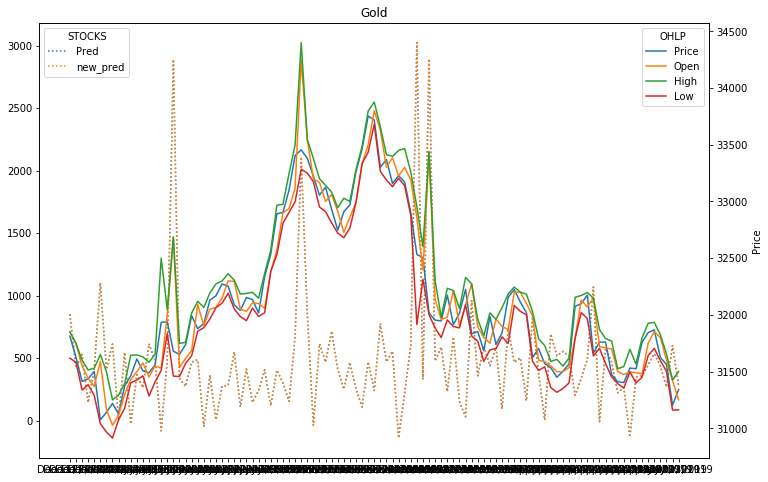

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax2.plot( data['test'].Price, label='Price' ); 
ax2.plot( data['test'].Open,  label='Open' );  
ax2.plot( data['test'].High,  label='High' );  
ax2.plot( data['test'].Low,   label='Low' );   
ax1.plot( data['test'].Pred,  label='Pred', linestyle=':', );  
ax1.plot( data['test'].new_pred,  label='new_pred', linestyle=':' );  

plt.title('Gold')
plt.ylabel('Price')
ax1.legend(loc='upper left',title='STOCKS')
ax2.legend(loc='upper right',title='OHLP')

(array([20., 47., 24.,  6.,  0.,  0.,  0.,  1.,  0.,  3.]),
 array([-139. ,  177.3,  493.6,  809.9, 1126.2, 1442.5, 1758.8, 2075.1,
        2391.4, 2707.7, 3024. ]),
 <a list of 10 Patch objects>)

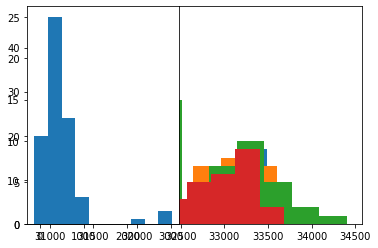

In [64]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(1, 2, 1)

ax1.hist( data['test'].Price )
ax1.hist( data['test'].Open )
ax1.hist( data['test'].High )
ax1.hist( data['test'].Low )
ax2.hist( data['test'].Pred )

In [65]:
new_model=LinearRegression().fit(data['train'][info],data['train']['new'])

In [68]:
new_model.score(data['train'][info],data['train']['new'])

0.9999941203360704

In [69]:
new_model.coef_

array([-1.00094252,  1.00492221, -1.01604305,  1.01202641])

In [70]:
new_model.intercept_

-0.21616304411972465

In [72]:
# its a preprocessing by polynomila features
features = {
    "train": PolynomialFeatures(2).fit_transform( data['train'][info]),
    "test":  PolynomialFeatures(2).fit_transform( data['test'][info]),    
}
model_new_poly = LinearRegression().fit( features['train'], data['train']['new'] )
model_new_poly.score( features['test'], data['test']['new'] )

0.9999998563364966

In [73]:
data['test']['new_linear'] = new_model.predict(data['test'][info ])
data['test']['new_poly']   = model_new_poly.predict(features['test'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
data['test']

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_pred,new_linear,new_poly
Date,,,,,,,,,,,,
"Dec 11, 2018","Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493,852.0,195.871760,195.404770
"Dec 12, 2018","Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664,422.0,43.810450,44.253544
"Dec 13, 2018","Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233,530.0,127.645552,127.645823
"Dec 14, 2018","Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539,144.0,126.848503,127.237121
"Dec 17, 2018","Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976,415.0,373.255871,372.578260
...,...,...,...,...,...,...,...,...,...,...,...,...
"Apr 26, 2019","Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322,535.0,247.562017,247.158174
"Apr 30, 2019","Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158,438.0,51.878875,52.215675
"May 01, 2019","May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305,269.0,113.004010,113.307620


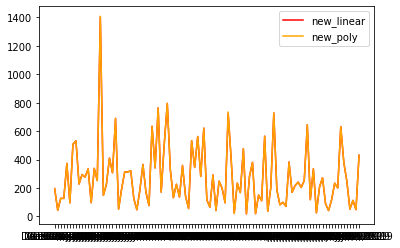

In [84]:

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot( data['test']['new_linear'], label='new_linear' ,color='red' );  
ax1.plot( data['test']['new_poly'], label='new_poly',color='orange' );  
ax1.legend(loc='upper right')

In [82]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [83]:
tcs_data=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/TCS.csv")

In [84]:
tcs_data['Date']=tcs_data['Date'].astype('datetime64')

In [85]:
tcs_data.set_index("Date")
tcs_data['month']=pd.DatetimeIndex(tcs_data['Date']).month
tcs_data['year']=pd.DatetimeIndex(tcs_data['Date']).year

In [86]:
nifty_data=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/Nifty50.csv")

In [87]:
nifty_data['Date']=nifty_data['Date'].astype('datetime64')
nifty_data['month']=pd.DatetimeIndex(nifty_data['Date']).month
nifty_data['year']=pd.DatetimeIndex(nifty_data['Date']).year
nifty_data.set_index("Date",inplace=True)



In [88]:
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),month,year
Date,,,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,5,2017
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,5,2017
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,5,2017
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,5,2017
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,5,2017
...,...,...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,5,2019
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,5,2019
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,5,2019


In [89]:
tcs_data =tcs_data[tcs_data.Series == 'EQ' ]

In [91]:
tcs_data.set_index("Date",inplace=True)

In [92]:
tcs_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year
Date,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,5,2017
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,5,2017
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,5,2017
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,5,2017
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,5,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,5,2019
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,5,2019
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,5,2019


In [93]:
mix_data=pd.concat([tcs_data['Close Price'],nifty_data['Close']],axis=1)

In [94]:
mix_data.columns=['Tcs','Nifty']

In [95]:
mix_data

,Tcs,Nifty
Date,,
2017-05-15,2365.10,9445.40
2017-05-16,2429.15,9512.25
2017-05-17,2455.35,9525.75
2017-05-18,2536.20,9429.45
2017-05-19,2507.15,9427.90
...,...,...
2019-05-07,2151.95,11497.90
2019-05-08,2152.85,11359.45
2019-05-09,2172.55,11301.80


In [97]:
return1=mix_data.pct_change().dropna(axis=0)

In [99]:
return1

,Tcs,Nifty
Date,,
2017-05-16,0.027081,0.007078
2017-05-17,0.010786,0.001419
2017-05-18,0.032928,-0.010109
2017-05-19,-0.011454,-0.000164
2017-05-22,0.009652,0.001098
...,...,...
2019-05-07,-0.002734,-0.008652
2019-05-08,0.000418,-0.012041
2019-05-09,0.009151,-0.005075


In [100]:
X  = return1['Nifty']
Y  = return1['Tcs']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Tcs   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.951
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.163
Time:                        12:52:46   Log-Likelihood:                 1079.2
No. Observations:                 493   AIC:                            -2154.
Df Residuals:                     491   BIC:                            -2146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.173      0.863      -0.002       0.003
Nifty          0.2374      0.170      1.397      0.163      -0.097       0.571
==============================================================================
Omnibus:                      963.938   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1263513.631
Skew:                         -13.224   Prob(JB):                         0.00
Kurtosis:                     249.597   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
nifty_monthly=nifty_data.groupby('month').last()
tcs_monthly=tcs_data.groupby('month').last()

In [123]:
return1_monthly=pd.concat([nifty_monthly['Close'],tcs_monthly['Close Price']],axis=1)
return1_monthly.columns=['Tcs','Nifty']

In [124]:
return1_monthly.pct_change().dropna()

,Tcs,Nifty
month,,
2,-0.003550,-0.015218
3,0.077035,0.009176
4,0.010689,0.129243
5,-0.051068,-0.058221
6,-0.038921,-0.132002
7,0.059939,0.050034
8,0.028530,0.071230
9,-0.064214,0.050664
10,-0.049755,-0.112447


In [128]:

X  = return1_monthly['Nifty']
Y  = return1_monthly['Tcs']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Tcs   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     4.263
Date:                Fri, 22 May 2020   Prob (F-statistic):             0.0659
Time:                        13:19:44   Log-Likelihood:                -87.199
No. Observations:                  12   AIC:                             178.4
Df Residuals:                      10   BIC:                             179.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7159.6701   1901.460      3.765      0.004    2922.954    1.14e+04
Nifty          1.9406      0.940      2.065      0.066      -0.154       4.035
==============================================================================
Omnibus:                        0.734   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.640
Skew:                           0.236   Prob(JB):                        0.726
Kurtosis:                       1.972   Cond. No.                     3.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""